### Analysis of an E-commerce Dataset

We have been provided with a combined e-commerce dataset. In this dataset, each user has the ability to post a rating and review for the products they purchased. Additionally, other users can evaluate the initial rating and review by expressing their trust or distrust.

This dataset includes a wealth of information for each user. Details such as their profile, ID, gender, city of birth, product ratings (on a scale of 1-5), reviews, and the prices of the products they purchased are all included. Moreover, for each product rating, we have information about the product name, ID, price, and category, the rating score, the timestamp of the rating and review, and the average helpfulness of the rating given by others (on a scale of 1-5).

The dataset is from several data sources, and we have merged all the data into a single CSV file named 'A Combined E-commerce Dataset.csv'. The structure of this dataset is represented in the header shown below.

| userId | gender | rating | review| item | category | helpfulness | timestamp | item_id | item_price | user_city|

    | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- |  ---- |  ---- |  
    
#### Description of Fields

* __userId__ - the user's id
* __gender__ - the user's gender
* __rating__ - the user's rating towards the item
* __review__ - the user's review towards the item
* __item__ - the item's name
* __category__ - the category of the item
* __helpfulness__ - the average helpfulness of this rating
* __timestamp__ - the timestamp when the rating is created
* __item_id__ - the item's id
* __item_price__ - the item's price
* __user_city__ - the city of user's birth

Note that, a user may rate multiple items and an item may receive ratings and reviews from multiple users. The "helpfulness" is an average value based on all the helpfulness values given by others.

There are four questions to explore with the data as shown below.



<img src="data-relation.png" align="left" width="400"/>


 #### Q1. Remove missing data

Please remove the following records in the csv file:

 * gender/rating/helpfulness is missing
 * review is 'none'

__Display the DataFrame, counting number of Null values in each column, and print the length of the data__ before and after removing the missing data.  

In [ ]:
# your code and solutions

In [2]:
import numpy as np
import pandas as pd

#display data frame
data = pd.read_csv("/content/The_E-commerce_Dataset.csv")
data

,userId,timestamp,review,item,rating,helpfulness,gender,category,item_id,item_price,user_city
0,4051,12807,Great job for what it is!,eBay,5.0,2.0,F,Online Stores & Services,88,149.00,39
1,4052,122899,Free Access Worth your Time,NetZero,5.0,0.0,F,Online Stores & Services,46,53.00,39
2,33,12700,AOL..I love you!!!!!!!!!!!!,AOL (America Online),5.0,4.0,F,Online Stores & Services,0,145.84,31
3,33,21000,EBAY!!! I LOVE YOU!!!! :-)*,eBay,5.0,4.0,F,Online Stores & Services,88,149.00,31
4,33,22300,Blair Witch...Oh Come On.......,Blair Witch Project,1.0,4.0,F,Movies,12,44.00,31
...,...,...,...,...,...,...,...,...,...,...,...
19995,10805,50600,The Upper Class Fast Food,Wendy's,2.0,3.0,F,Restaurants & Gourmet,84,69.00,18
19996,10806,82201,What more can you ask for????,Olive Garden,4.0,0.0,M,Restaurants & Gourmet,49,32.00,28
19997,10806,82201,Excellent steak for a good price,Outback Steakhouse,4.0,3.0,M,Restaurants & Gourmet,50,25.00,28
19998,10807,31504,Different story world,J. K. Rowling - Harry Potter and the Sorcerer'...,4.0,0.0,M,Books,36,96.00,27


In [3]:
#null value in the dataset in each column
data.isnull().sum()

userId          0
timestamp       0
review          0
item            0
rating         17
helpfulness    22
gender         27
category        0
item_id         0
item_price      0
user_city       0
dtype: int64

In [4]:
#dataset length
#data.info()
#data.shape
len(data)

20000

In [5]:
#null value remove
data_rm = data.dropna()
data_rm

,userId,timestamp,review,item,rating,helpfulness,gender,category,item_id,item_price,user_city
0,4051,12807,Great job for what it is!,eBay,5.0,2.0,F,Online Stores & Services,88,149.00,39
1,4052,122899,Free Access Worth your Time,NetZero,5.0,0.0,F,Online Stores & Services,46,53.00,39
2,33,12700,AOL..I love you!!!!!!!!!!!!,AOL (America Online),5.0,4.0,F,Online Stores & Services,0,145.84,31
3,33,21000,EBAY!!! I LOVE YOU!!!! :-)*,eBay,5.0,4.0,F,Online Stores & Services,88,149.00,31
4,33,22300,Blair Witch...Oh Come On.......,Blair Witch Project,1.0,4.0,F,Movies,12,44.00,31
...,...,...,...,...,...,...,...,...,...,...,...
19995,10805,50600,The Upper Class Fast Food,Wendy's,2.0,3.0,F,Restaurants & Gourmet,84,69.00,18
19996,10806,82201,What more can you ask for????,Olive Garden,4.0,0.0,M,Restaurants & Gourmet,49,32.00,28
19997,10806,82201,Excellent steak for a good price,Outback Steakhouse,4.0,3.0,M,Restaurants & Gourmet,50,25.00,28
19998,10807,31504,Different story world,J. K. Rowling - Harry Potter and the Sorcerer'...,4.0,0.0,M,Books,36,96.00,27


In [6]:
#no null value in the dataset in each column
data_rm.isnull().sum()

userId         0
timestamp      0
review         0
item           0
rating         0
helpfulness    0
gender         0
category       0
item_id        0
item_price     0
user_city      0
dtype: int64

In [7]:
len(data_rm)

19934

#### Q2. Descriptive statistics

With the cleaned data in Q1, please provide the data summarization as below:

* Q2.1 total number of unique users, unique reviews, unique items, and unique categories
* Q2.2 descriptive statistics, e.g., the total number, mean, std, min and max regarding all rating records
* Q2.3 descriptive statistics, e.g., mean, std, max, and min of the number of items rated by different genders
* Q2.4 descriptive statistics, e.g., mean, std, max, min of the number of ratings that received by each items


In [ ]:
# your code and solutions

In [8]:
#getting column names
for col in data_rm.columns:
  print(col)

userId
timestamp
review
item
rating
helpfulness
gender
category
item_id
item_price
user_city


In [9]:
#unique users
data_rm['userId'].value_counts()

6408     45
823      34
2098     30
134      28
4660     28
         ..
6927      1
1113      1
6924      1
6923      1
10808     1
Name: userId, Length: 8565, dtype: int64

In [10]:
#unique reviews
data_rm['review'].value_counts()

none                                          18
Great Movie                                   14
American Beauty                               12
Sleepy Hollow                                 12
Toy Story 2                                   11
                                              ..
Zelda is a Big Hit                             1
Have fun GET PAID!!!!!!!!!!!!                  1
Are they ever too young?  Mother's Opinion     1
Funny timings                                  1
Boldly Displaying Sigourneys Cleavage ..       1
Name: review, Length: 19460, dtype: int64

In [17]:
#unique items
data_rm['item'].value_counts()

AOL (America Online)                                   941
All Advantage                                          657
eBay                                                   596
McDonald's                                             416
NetZero                                                351
                                                      ... 
How the Grinch Stole Christmas                         143
The Legend Of Zelda Ocarina Of Time for Nintendo 64    143
Northwest Airlines                                     141
Applebee's                                             141
FOX                                                    139
Name: item, Length: 89, dtype: int64

In [16]:
#unique categories
data_rm['category'].value_counts()

Movies                      7058
Online Stores & Services    5293
Restaurants & Gourmet       1704
Games                       1531
Hotels & Travel             1362
Kids & Family               1247
Personal Finance             897
Media                        636
Books                        206
Name: category, dtype: int64

In [15]:
data_rm['rating'].describe()

count    19934.000000
mean         3.701415
std          1.404546
min          1.000000
25%          3.000000
50%          4.000000
75%          5.000000
max          5.000000
Name: rating, dtype: float64

In [14]:
data_rm['gender'].describe()

count     19934
unique        2
top           M
freq      10135
Name: gender, dtype: object

In [13]:
data_rm['item'].describe()

count                    19934
unique                      89
top       AOL (America Online)
freq                       941
Name: item, dtype: object

#### Q3. Plotting and Analysis

Please try to explore the correlation between gender/helpfulness/category and ratings; for instance, do female/male users tend to provide higher ratings than male/female users? Hint: you may use the boxplot function to plot figures for comparison (___Challenge___)
    
You may need to select the most suitable graphic forms for ease of presentation. Most importantly, for each figure or subfigure, please summarise ___what each plot shows___ (i.e. observations and explanations). Finally, you may need to provide an overall summary of the data.

In [ ]:
# your code and solutions

<Axes: xlabel='userId', ylabel='rating'>

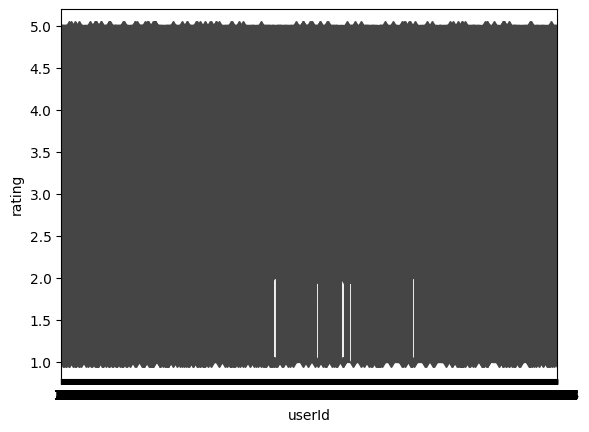

In [12]:
import seaborn as sns
sns.boxplot(x='userId', y ='rating', data=data_rm)

<Axes: xlabel='gender', ylabel='rating'>

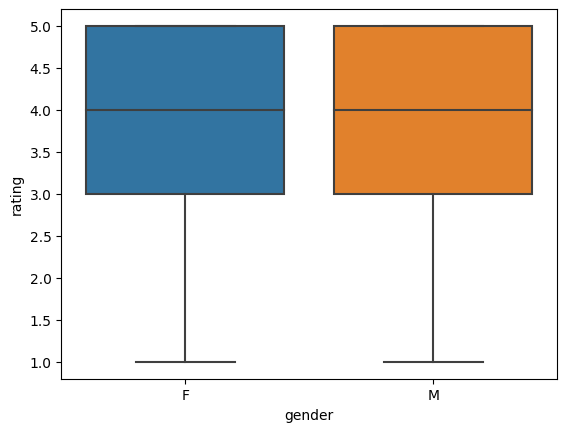

In [18]:
sns.boxplot(x='gender', y ='rating', data=data_rm)

<Axes: xlabel='helpfulness', ylabel='rating'>

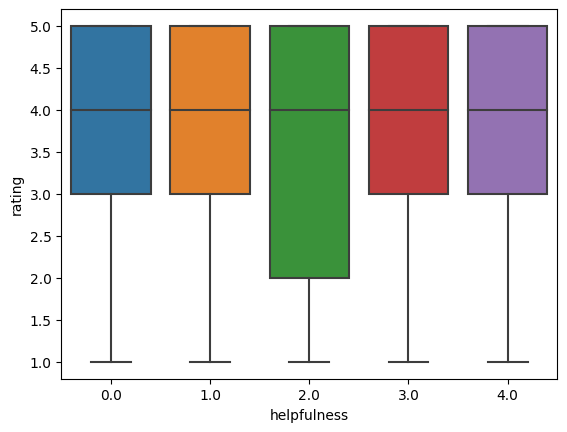

In [19]:
sns.boxplot(x='helpfulness', y ='rating', data=data_rm)

<Axes: xlabel='category', ylabel='rating'>

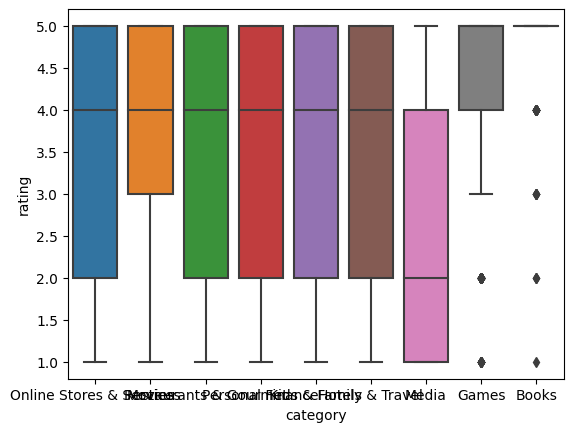

In [20]:
sns.boxplot(x='category', y ='rating', data=data_rm)

#### Q4. Detect and remove outliers

We may define outlier users, reviews and items with three rules (if a record meets one of the rules, it is regarded as an outlier):

* reviews of which the helpfulness is no more than 2
* users who rate less than 7 items
* items that receives less than 11 ratings

Please remove the corresponding records in the csv file that involves outlier users, reviews and items. After that, __print the length of the data__.

In [23]:
# your code and solutions
# Remove reviews with helpfulness <= 2
data_rm = data_rm[data_rm['helpfulness'] > 2]
data_rm

,userId,timestamp,review,item,rating,helpfulness,gender,category,item_id,item_price,user_city
2,33,12700,AOL..I love you!!!!!!!!!!!!,AOL (America Online),5.0,4.0,F,Online Stores & Services,0,145.84,31
3,33,21000,EBAY!!! I LOVE YOU!!!! :-)*,eBay,5.0,4.0,F,Online Stores & Services,88,149.00,31
4,33,22300,Blair Witch...Oh Come On.......,Blair Witch Project,1.0,4.0,F,Movies,12,44.00,31
6,33,32100,Go down under Mateys!!!!!,Outback Steakhouse,5.0,4.0,F,Restaurants & Gourmet,50,25.00,31
9,4053,22304,The best on the web.,Amazon.com,5.0,3.0,F,Online Stores & Services,3,129.82,22
...,...,...,...,...,...,...,...,...,...,...,...
19992,10805,11900,R.I.P,MTV,1.0,4.0,F,Media,39,138.00,18
19993,10805,12000,Leave them be...,Teletubbies,5.0,4.0,F,Kids & Family,76,48.25,18
19994,10805,50500,"Thank you, Drive Thru Please",McDonald's,3.0,3.0,F,Restaurants & Gourmet,41,30.74,18
19995,10805,50600,The Upper Class Fast Food,Wendy's,2.0,3.0,F,Restaurants & Gourmet,84,69.00,18


In [25]:
# Calculate the number of ratings per user and per item
user_ratings_count = data_rm.groupby('userId')['rating'].count()
item_ratings_count = data_rm.groupby('item_id')['rating'].count()

In [26]:
# Remove users who rated less than 7 items
valid_users = user_ratings_count[user_ratings_count >= 7].index
data_rm = data_rm[data_rm['userId'].isin(valid_users)]

In [27]:
# Remove items with less than 11 ratings
valid_items = item_ratings_count[item_ratings_count >= 11].index
data_rm = data_rm[data_rm['item_id'].isin(valid_items)]

In [28]:
# Print the length of the filtered dataset
print("Length of the data after removing outliers:", len(data_rm))

Length of the data after removing outliers: 2752


In [33]:
# Save the cleaned dataset to a new CSV file
data_rm.to_csv('cleaned_dataset.csv', index=False)
# new_df = pd.read_csv('cleaned_dataset.csv')
# new_df

,userId,timestamp,review,item,rating,helpfulness,gender,category,item_id,item_price,user_city
0,4081,71900,Not always McCrap,McDonald's,4.0,3.0,M,Restaurants & Gourmet,41,30.74,4
1,4081,72000,I dropped the chalupa even before he told me to,Taco Bell,1.0,4.0,M,Restaurants & Gourmet,74,108.30,4
2,4081,72000,The Wonderful World of Wendy,Wendy's,5.0,4.0,M,Restaurants & Gourmet,84,69.00,4
3,4081,100399,They actually did it,"South Park: Bigger, Longer & Uncut",5.0,3.0,M,Movies,68,143.11,4
4,4081,100399,Hey! Gimme some pie!,American Pie,3.0,3.0,M,Movies,6,117.89,4
...,...,...,...,...,...,...,...,...,...,...,...
2747,2445,22000,Great movie!,Austin Powers: The Spy Who Shagged Me,5.0,3.0,M,Movies,9,111.00,5
2748,2445,30700,Good food!,Outback Steakhouse,5.0,3.0,M,Restaurants & Gourmet,50,25.00,5
2749,2445,61500,Great movie!,Fight Club,5.0,3.0,M,Movies,26,97.53,5
2750,2445,100500,Awesome Game.,The Sims 2: Open for Business for Windows,5.0,4.0,M,Games,79,27.00,5
